<a href="https://colab.research.google.com/github/keivalya/artisan-ai-assignment/blob/main/email_engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/keivalya/artisan-ai-assignment.git && cd artisan-ai-assignment

Cloning into 'artisan-ai-assignment'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 8), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (21/21), 304.54 KiB | 3.01 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [2]:
# Importing raw dataset and exploring it (commented to avoid LONG output)
'''
import pickle
with open('artisan-ai-assignment/email_campaigns.pkl', 'rb') as f:
    data = pickle.load(f)
data
'''

"\nimport pickle\nwith open('artisan-ai-assignment/email_campaigns.pkl', 'rb') as f:\n    data = pickle.load(f)\ndata\n"

In [3]:
# Converting dataset into a readable (structured) dataFrame
import pandas as pd

file_path = 'artisan-ai-assignment/email_campaigns.pkl'
email_campaigns_df = pd.read_pickle(file_path)

email_list = []
for campaign_dict in email_campaigns_df:
    for campaign_key in campaign_dict:
        email_list.extend(campaign_dict[campaign_key])

filtered_email_list = [element for element in email_list if isinstance(element, dict)]
filtered_email_df = pd.DataFrame(filtered_email_list)
filtered_email_df

,subject,body,opened,meeting link clicked,responded,meeting_link_clicked
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",False,False,False,NaN
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",True,False,False,NaN
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",False,False,False,NaN
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",True,True,False,NaN
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",False,False,False,NaN
...,...,...,...,...,...,...
149,Streamline HR and Boost Performance 💼,"Hello [Recipient's Name],\n\nEfficiency is kin...",True,True,False,NaN
150,Boost Your Brand Visibility 🚀,"Hello [Recipient's Name],\n\nWant to skyrocket...",True,False,False,NaN
151,🔍 Outpace Competitors with Insightful Analytics,"Hi [Recipient's Name],\n\nI noticed you're nav...",True,False,False,NaN
152,Tailored Analytics for You,"Hey [Recipient's Name],\n\nYour brand deserves...",False,False,False,NaN


## Performing an **exploratory data analysis** (EDA) on the filtered email DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# information about the DataFrame
info = filtered_email_df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject               154 non-null    object
 1   body                  154 non-null    object
 2   opened                154 non-null    object
 3   meeting link clicked  138 non-null    object
 4   responded             154 non-null    object
 5   meeting_link_clicked  16 non-null     object
dtypes: object(6)
memory usage: 7.3+ KB


In [6]:
# statistics for numerical columns
description = filtered_email_df.describe()
description

,subject,body,opened,meeting link clicked,responded,meeting_link_clicked
count,154,154,154,138,154,16
unique,154,154,2,2,2,2
top,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",True,False,False,False
freq,1,1,114,97,146,11


In [7]:
# missing values check
missing_values = filtered_email_df.isna().sum()
missing_values

subject                   0
body                      0
opened                    0
meeting link clicked     16
responded                 0
meeting_link_clicked    138
dtype: int64

True     114
False     40
Name: opened, dtype: int64


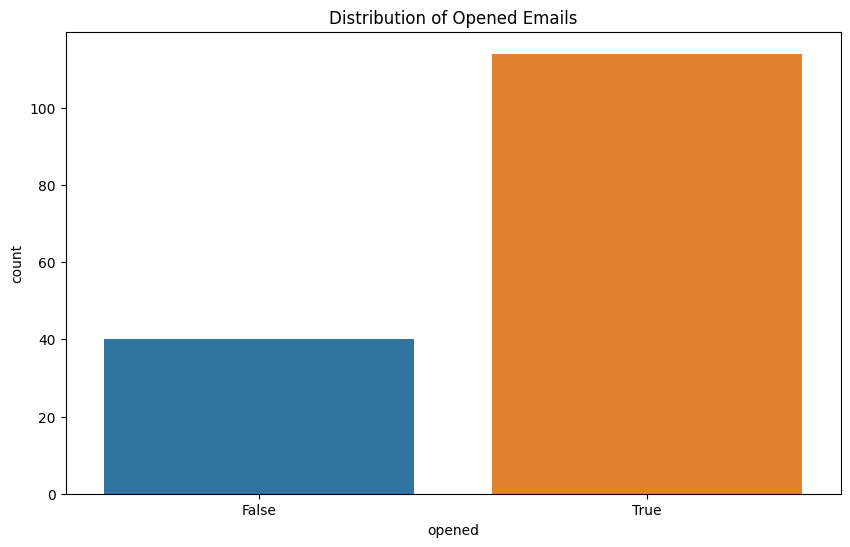

In [8]:
# Distribution of opened emails
opened_distribution = filtered_email_df['opened'].value_counts()
print(opened_distribution)

# Visualization: Distribution of opened emails
plt.figure(figsize=(10, 6))
sns.countplot(x='opened', data=filtered_email_df)
plt.title('Distribution of Opened Emails')
plt.show()

False    97
True     41
Name: meeting link clicked, dtype: int64


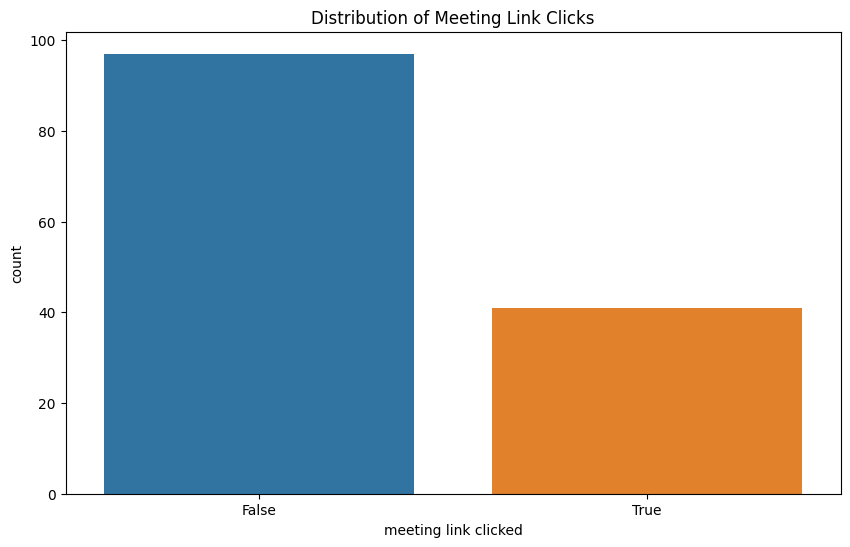

In [9]:
# Distribution of clicks on meeting link
link_clicked_distribution = filtered_email_df['meeting link clicked'].value_counts()
print(link_clicked_distribution)

# Visualization: Distribution of clicks on meeting link
plt.figure(figsize=(10, 6))
sns.countplot(x='meeting link clicked', data=filtered_email_df)
plt.title('Distribution of Meeting Link Clicks')
plt.show()

False    146
True       8
Name: responded, dtype: int64


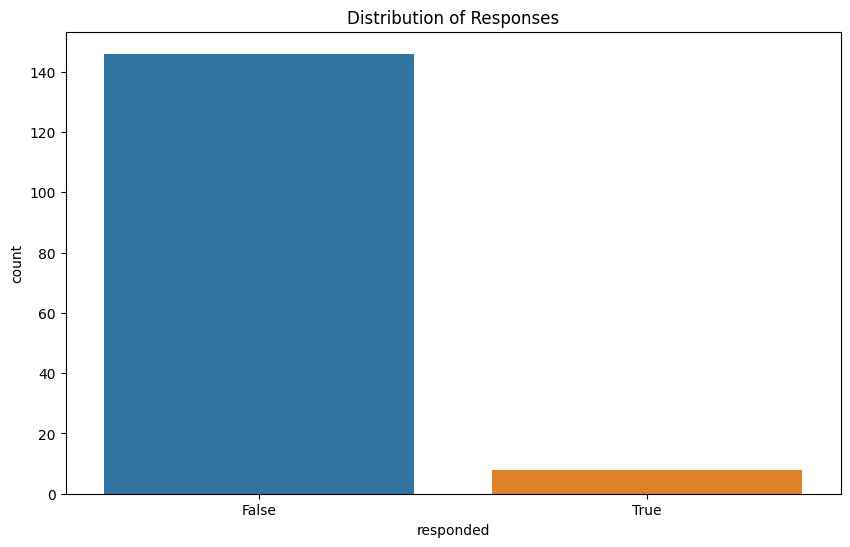

In [10]:
# Distribution of responses
response_distribution = filtered_email_df['responded'].value_counts()
print(response_distribution)

# Visualization: Distribution of responses
plt.figure(figsize=(10, 6))
sns.countplot(x='responded', data=filtered_email_df)
plt.title('Distribution of Responses')
plt.show()

## Identifying **key patterns** and **insights** using statistical and visualization techniques

In [11]:
# Converting 'opened', 'meeting link clicked', and 'responded' columns to boolean for analysis
filtered_email_df['opened'] = filtered_email_df['opened'].astype(bool)
filtered_email_df['meeting link clicked'] = filtered_email_df['meeting link clicked'].fillna(False).astype(bool)
filtered_email_df['responded'] = filtered_email_df['responded'].astype(bool)

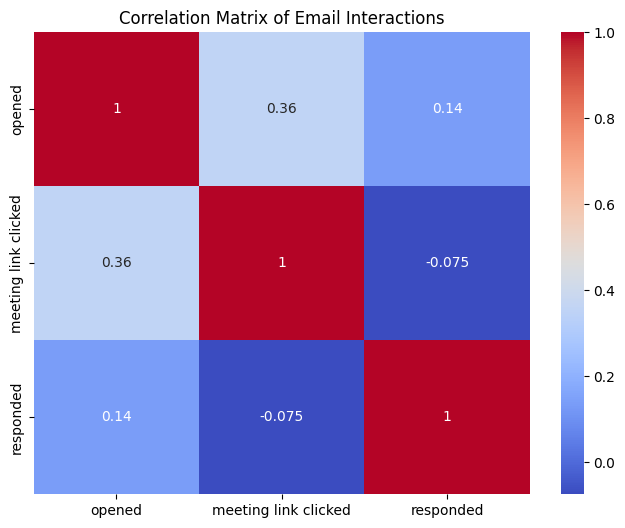

In [12]:
# Correlation analysis
correlation = filtered_email_df[['opened', 'meeting link clicked', 'responded']].corr()

# Visualization: Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Email Interactions')
plt.show()

From this, I can say that there is a moderate positive relationship between the *opened* and *meeting link clicked*
- the number of opened emails increases, the number of times the meeting link is clicked tends to increase as well.

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


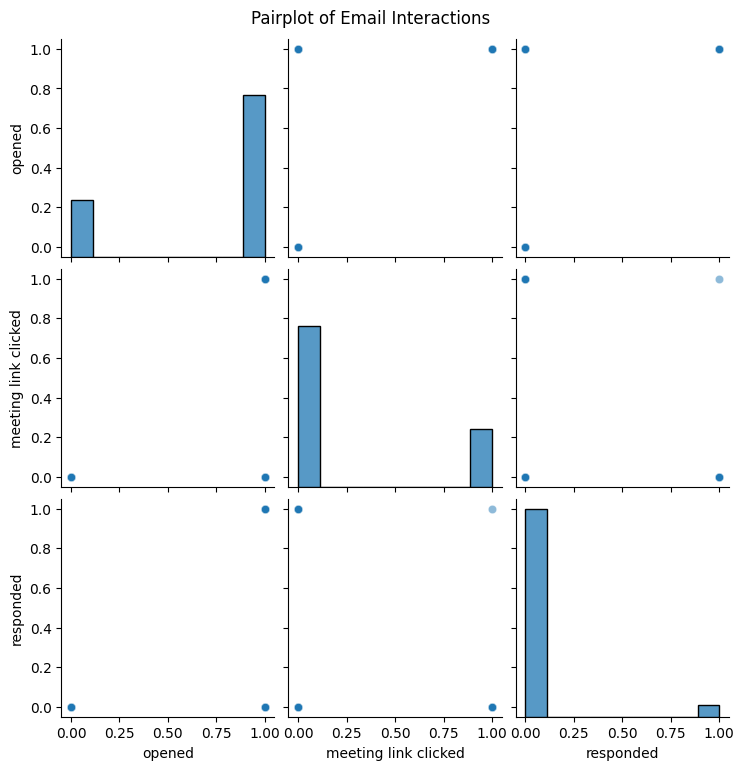

In [13]:
# Visualization: Pairplot to observe relationships between variables
sns.pairplot(filtered_email_df[['opened', 'meeting link clicked', 'responded']], kind="scatter", plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Email Interactions', y=1.02)
plt.show()

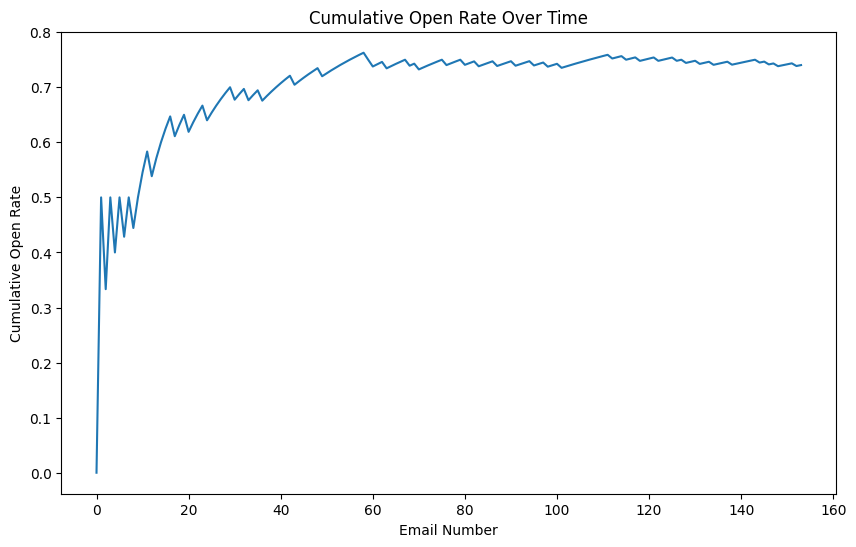

In [14]:
# Visualization: Email open rate over time (assuming chronological order)
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_email_df['opened'].cumsum() / (filtered_email_df.index + 1))
plt.title('Cumulative Open Rate Over Time')
plt.xlabel('Email Number')
plt.ylabel('Cumulative Open Rate')
plt.show()
# provide insights into how the effectiveness of the campaign evolves with each email.

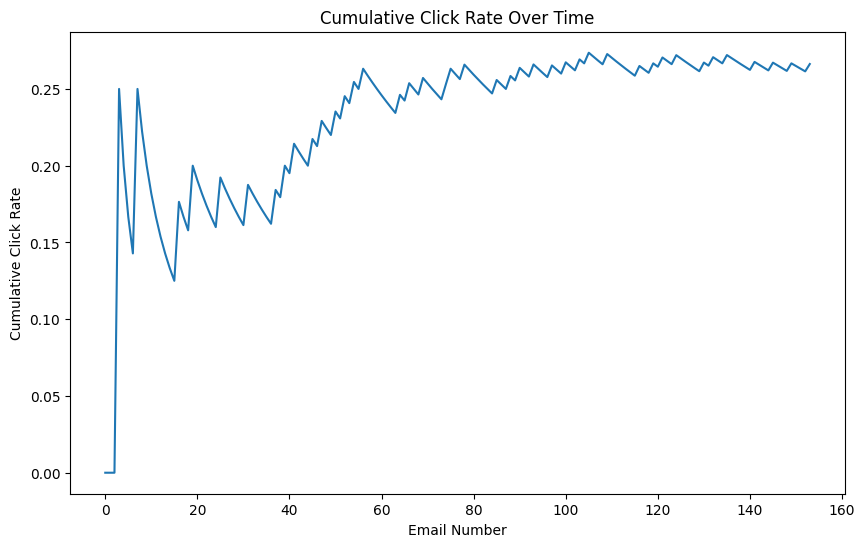

In [15]:
# Visualization: Email click rate over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_email_df['meeting link clicked'].cumsum() / (filtered_email_df.index + 1))
plt.title('Cumulative Click Rate Over Time')
plt.xlabel('Email Number')
plt.ylabel('Cumulative Click Rate')
plt.show()

# Machine Learning (Modeling)

## Logistic Regression

Accuracy: 0.8085106382978723

{'False': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9}, 'True': {'precision': 0.8085106382978723, 'recall': 1.0, 'f1-score': 0.8941176470588235, 'support': 38}, 'accuracy': 0.8085106382978723, 'macro avg': {'precision': 0.40425531914893614, 'recall': 0.5, 'f1-score': 0.44705882352941173, 'support': 47}, 'weighted avg': {'precision': 0.6536894522408329, 'recall': 0.8085106382978723, 'f1-score': 0.7229036295369211, 'support': 47}}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

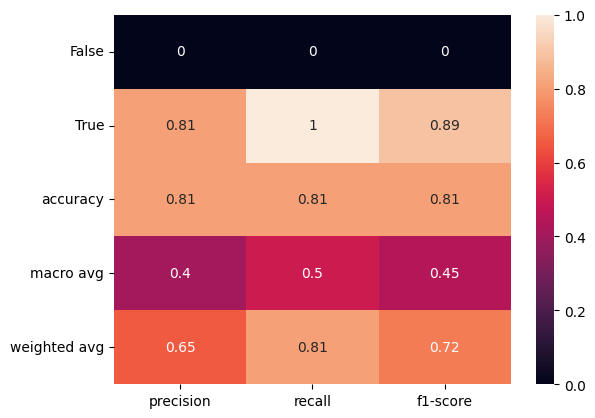

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Data Preparation: 'meeting link clicked' and 'responded' as features for predicting 'opened'
X = filtered_email_df[['meeting link clicked', 'responded']]
y = filtered_email_df['opened']

# Encoding categorical features
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Model Selection: Using Logistic Regression
model = LogisticRegression()

# Training the Model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

class_rep = classification_report(y_test, y_pred, output_dict=True)
print(class_rep)
sns.heatmap(pd.DataFrame(class_rep).iloc[:-1, :].T, annot=True)

(changing approach as pervious model was not so satisfactory)
## Term Frequency-Inverse Document Frequency

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9}, '1': {'precision': 0.8085106382978723, 'recall': 1.0, 'f1-score': 0.8941176470588235, 'support': 38}, 'accuracy': 0.8085106382978723, 'macro avg': {'precision': 0.40425531914893614, 'recall': 0.5, 'f1-score': 0.44705882352941173, 'support': 47}, 'weighted avg': {'precision': 0.6536894522408329, 'recall': 0.8085106382978723, 'f1-score': 0.7229036295369211, 'support': 47}}


<Axes: >

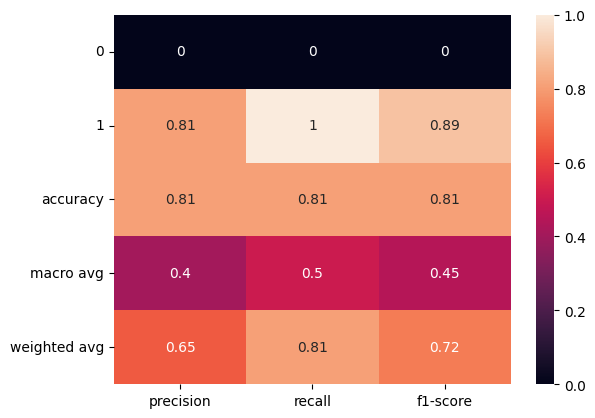

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

email_campaigns_df = pd.read_pickle(file_path)

email_list = []
for campaign_dict in email_campaigns_df:
    for campaign_key in campaign_dict:
        email_list.extend(campaign_dict[campaign_key])

filtered_email_list = [element for element in email_list if isinstance(element, dict)]
filtered_email_df = pd.DataFrame(filtered_email_list)
filtered_email_df

# Combine 'subject' and 'body' into a single text feature
filtered_email_df['text'] = filtered_email_df['subject'] + " " + filtered_email_df['body']

# Select features and target
X = filtered_email_df['text']
y = filtered_email_df['opened'].astype(int)  # Ensure the target is integer

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a TF-IDF Vectorizer and Random Forest Classifier Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Training the pipeline
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
class_rep = classification_report(y_test, y_pred, output_dict=True)
print(class_rep)
sns.heatmap(pd.DataFrame(class_rep).iloc[:-1, :].T, annot=True)

(approach #3, as previous models were not upto the mark)
## Building ANN

Epoch 1/10
2/2 [==============================] - 13s 2s/step - loss: 0.6931 - accuracy: 0.4592 - val_loss: 0.6801 - val_accuracy: 0.8400
Epoch 2/10
2/2 [==============================] - 1s 475ms/step - loss: 0.6840 - accuracy: 0.6735 - val_loss: 0.6638 - val_accuracy: 0.8400
Epoch 3/10
2/2 [==============================] - 1s 472ms/step - loss: 0.6726 - accuracy: 0.6735 - val_loss: 0.6456 - val_accuracy: 0.8400
Epoch 4/10
2/2 [==============================] - 1s 536ms/step - loss: 0.6632 - accuracy: 0.6735 - val_loss: 0.6210 - val_accuracy: 0.8400
Epoch 5/10
2/2 [==============================] - 1s 601ms/step - loss: 0.6458 - accuracy: 0.6735 - val_loss: 0.5872 - val_accuracy: 0.8400
Epoch 6/10
2/2 [==============================] - 1s 634ms/step - loss: 0.6275 - accuracy: 0.6735 - val_loss: 0.5344 - val_accuracy: 0.8400
Epoch 7/10
2/2 [==============================] - 1s 731ms/step - loss: 0.5971 - accuracy: 0.6735 - val_loss: 0.4659 - val_accuracy: 0.8400
Epoch 8/10
2/2 [======

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

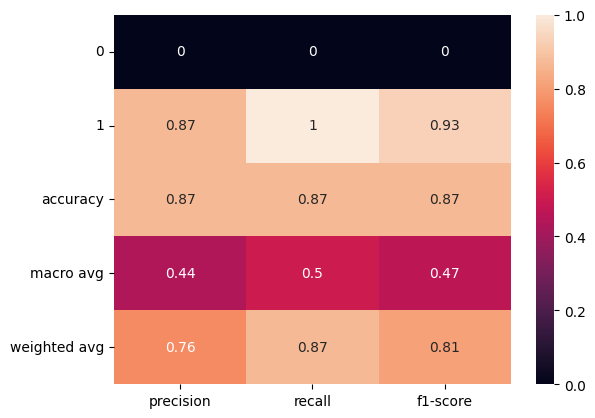

In [18]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Combine 'subject' and 'body' into a single text feature
filtered_email_df['text'] = filtered_email_df['subject'] + " " + filtered_email_df['body']

# Select features and target
X = filtered_email_df['text']
y = filtered_email_df['opened'].astype(int)  # Ensure the target is integer

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

vocab_size = len(tokenizer.word_index) + 1  # Plus 1 for padding
embedding_dim = 100  # Size of the word embeddings

# network architecture
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=100))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")
class_rep = classification_report(y_test, y_pred, output_dict=True)
print(class_rep)
sns.heatmap(pd.DataFrame(class_rep).iloc[:-1, :].T, annot=True)

(approach #4)
## SMOTE

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Accuracy: 0.8085106382978723
Classification Report:
 {'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9}, '1': {'precision': 0.8085106382978723, 'recall': 1.0, 'f1-score': 0.8941176470588235, 'support': 38}, 'accuracy': 0.8085106382978723, 'macro avg': {'precision': 0.40425531914893614, 'recall': 0.5, 'f1-score': 0.44705882352941173, 'support': 47}, 'weighted avg': {'precision': 0.6536894522408329, 'recall': 0.8085106382978723, 'f1-score': 0.7229036295369211, 'support': 47}}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

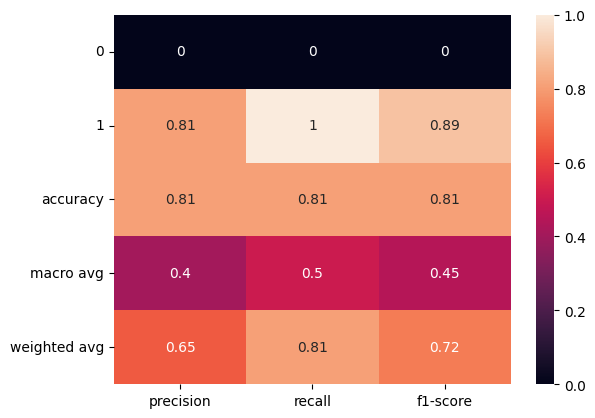

In [19]:
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
import nltk

# Ensure you have the NLTK stopwords downloaded
nltk.download('stopwords')

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a TF-IDF Vectorizer with English stop words
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))

# Fit and transform the vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Only transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

class_rep = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:\n", class_rep)
sns.heatmap(pd.DataFrame(class_rep).iloc[:-1, :].T, annot=True)

# Model Interpretations

1. **Imbalanced Dataset**: The dataset is imbalanced, hence, Precision and Recall play a major role in determining its performance.

2. **Precision and Recall**:
    a. The model failed to correctly predict any of the negative class instances. It never predicts an email as not opened.
    b. When the model always predicts an email as opened, it is correct 81% of the time.

3. **Accuracy**: The overall accuracy of the model is 0.81.

4. **Model Bias**: The model is heavily biased towards predicting the majority class. The lack of predictive power for the minority class (class 0) suggests that either the model isn't receiving the right features to distinguish between the classes or that the techniques used to address class imbalance (like SMOTE) aren't effective enough in this context.